# Lab 2.1: Radiative budget, forcing and temperature response

### Running the OSCAR climate model

This lab will be our first encounter with the OSCAR compact earth system model.  An introduction to running OSCAR can be found in the [Quickstart](http://www.princeton.edu/~skclark/oscar/quickstart.html#) page of the documentation of the model for the course.  The homepage of the documentation can be found here: [www.princeton.edu/~skclark/oscar/](http://www.princeton.edu/~skclark/oscar/)

### Making panel plots and saving figures

For writing up projects it will be helpful to be able to make panel plots and save graphics produced using matplotlib.  This can be done using the [`Figure.savefig`](https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig) command in ``matplotlib.``  For example:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

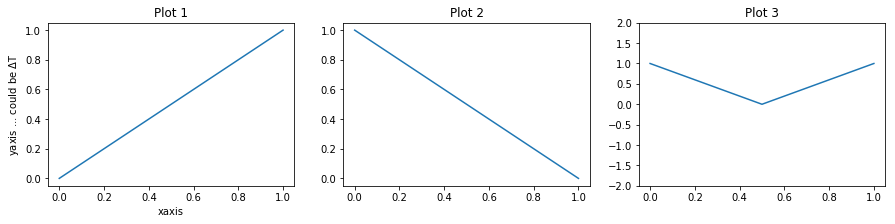

In [24]:
## Figure with 3 subplots
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 3)

# plot 1
axes[0].plot([0, 1], [0, 1])
axes[0].set_title('Plot 1')
axes[0].set_xlabel('xaxis')
axes[0].set_ylabel('yaxis ... could be $\mathregular{\Delta}$T ')

# plot 2
axes[1].plot([0, 1], [1, 0])
axes[1].set_title('Plot 2')

# plot 3
axes[2].plot([0, 0.5, 1], [1, 0, 1])
axes[2].set_title('Plot 3')
axes[2].set_ylim([-2, 2])


fig.savefig('example-fig.pdf')  # Change the extension of the file for a different format (e.g. 'example-fig.png')

In [25]:
import numpy as np

from oscar import OSCAR

### Run the historical simple case and check the results

Here as an example, we will run OSCAR in its default configuration through the year 2100.  

In [26]:
enddate = 2100
results = OSCAR().run(enddate) # By default OSCAR runs with emissions stopping in 2011

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


### Dictionaries
OSCAR outputs data in the form of a dictionary.  Let's recall a few properties of dictionaries.

In [27]:
example_dict = {'a': 1, 'b': 2}
print example_dict['a']  # Retrieve the value associated with key 'a'

# If you don't know the keys to a dictionary you can print the result of the keys() method
print example_dict.keys()

1
['a', 'b']


For example we could use the `.keys()` method to display all the variables output by OSCAR.  Some of these variables are simple 1D arrays (with a length of the number of years in the simulation), while others are dictionaries.

In [28]:
results.keys()

['EOC',
 'D_O3t',
 'D_O3s',
 'D_AREA',
 'RFcon',
 'D_HVSNK_CH4',
 'D_csoil1',
 'ENH3',
 'D_csoil2',
 'EN2O',
 'RF_halo',
 'D_HVSNK_N2O',
 'RF_LCC',
 'ECO',
 'D_N2O_lag',
 'D_CH4_lag',
 'RF',
 'RF_CH4',
 'D_BC',
 'ENOX',
 'D_EBB_SO2',
 'RF_H2Os',
 'D_EBB_BC',
 'RF_N2O',
 'D_EBB_N2O',
 'D_EBB_NH3',
 'D_gst',
 'RF_BC',
 'REGION_MEAN_ALB',
 'RF_SOA',
 'D_AERh',
 'OSNK',
 'D_CO2',
 'D_lst',
 'EPFC',
 'EODS',
 'D_EBB_OC',
 'D_SO4',
 'RFsolar',
 'ESO2',
 'D_XSNK_CH4',
 'D_lyp',
 'RF_SO4',
 'BIOME_MEAN_ALB',
 'D_sst',
 'RFvolc',
 'D_EBB_CO',
 'D_CH4',
 'D_EESC',
 'RF_O3s',
 'D_pH',
 'RF_O3t',
 'LSNK',
 'D_N2O',
 'D_mld',
 'D_EBB_NOX',
 'D_ewet',
 'D_POA',
 'D_OHSNK_CH4',
 'D_fmort',
 'D_EBB_CO2',
 'D_cveg',
 'D_dic',
 'RF_NO3',
 'D_fmet',
 'RF_POA',
 'D_SOA',
 'ECH4',
 'D_AWET',
 'D_NO3',
 'EVOC',
 'D_efire',
 'GLOBAL_MEAN_ALB',
 'D_EWET',
 'RF_warm',
 'RF_atm',
 'D_gyp',
 'EFF',
 'D_EBB_VOC',
 'EBC',
 'D_npp',
 'D_EBB_CH4',
 'D_rh2',
 'D_rh1',
 'EHFC',
 'D_OHC',
 'RF_CO2',
 'RF_cloud',
 'RF_B

Global radiative forcing (variable RF) is output as an array; each value represents the value for a particular year.

In [29]:
results['RF']

array([  0.00000000e+00,   0.00000000e+00,  -1.23468749e-10,
        -2.35357678e-10,  -2.13143225e-10,  -2.12685800e-10,
        -2.12343101e-10,  -2.94432145e-10,  -4.58172222e-10,
        -4.57115790e-10,  -4.56324672e-10,  -5.53708357e-10,
        -6.50696386e-10,  -6.49788667e-10,  -6.38274822e-10,
        -6.26941610e-10,  -6.26561303e-10,  -6.26267815e-10,
        -6.26038665e-10,  -6.25857144e-10,  -6.25711039e-10,
        -6.25591301e-10,  -6.25490881e-10,  -6.25405061e-10,
        -6.25329954e-10,  -6.25263064e-10,  -6.25202168e-10,
        -6.25145824e-10,  -6.25092866e-10,  -6.25042573e-10,
        -6.24994279e-10,  -6.24947483e-10,  -6.24901908e-10,
        -6.24857388e-10,  -6.24813479e-10,  -6.24770402e-10,
        -6.24727770e-10,  -6.24685637e-10,  -6.24643892e-10,
        -6.24602425e-10,  -6.24561625e-10,  -6.24520824e-10,
        -6.24480523e-10,  -6.24440277e-10,  -6.24400531e-10,
        -6.24360841e-10,  -6.24321594e-10,  -6.24282404e-10,
        -6.24243657e-10,

We could make a quick one panel plot of the time series of radiative forcing.  We'll use the [`np.arange`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) function along with the length of the array to create an array representing the year in the simulation.

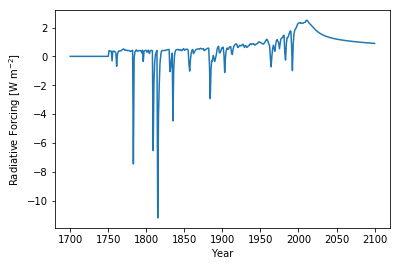

In [30]:
year = np.arange(len(results['RF'])) + 1700

fig, ax = plt.subplots(1, 1)
ax.plot(year, results['RF'])
ax.set_xlabel('Year')
ax.set_ylabel('Radiative Forcing [W m$^{-2}$]')

<div class="alert alert-info"><h1>Exercise 1</h1></div>

1. Plot the simulated change in temperature, the simulated change in atmospheric CO2 and the global fossil fuel emissions used as input in this model run. Use 2 panels (follow the example above), add units.
2. Explain why the temperature decreases after 2010 in this run.

### Nested dictionaries
Some variables output by OSCAR are dictionaries of arrays.  These include [emissions of greenhouse gases and aerosols](http://www.princeton.edu/~skclark/oscar/outputs.html#emissions).  This is because emissions are prescribed on a region-by-region basis.  For example if we look at the keys of the dictionary associated with the fossil fuel emissions (`'EFF'`), we see a list of regions, in addition to a key of `'Total'`.

Depending on the constituent, the units of the emissions vary.  Fossil fuel emissions are given in Gt per year, but for other emissions variables see the [Emissions section](http://www.princeton.edu/~skclark/oscar/outputs.html#emissions) of the [Output variables](http://www.princeton.edu/~skclark/oscar/outputs.html#) page in the documentation.

In [32]:
results['EFF'].keys()

['Europe',
 'Bunker fuels',
 'China region',
 'South & South-East Asia',
 'Tropical Africa',
 'Former Soviet Union',
 'North America',
 'South & Central America',
 'North Africa & Middle East',
 'Total',
 'Pacific Developed region']

For now we are mainly interested in the total emissions.  We can select this with this nested getitem syntax; the key in the left pair of square brackets is for querying the `results` dictionary and the right pair of square brackets is for queurying the dictionary `results['EFF']` returns.  Here we get the desired result, a one dimensional time series for the total emissions from fossil fuels.

In [33]:
results['EFF']['Total']

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

<div class="alert alert-info"><h1>Exercise 2</h1></div>

1. Plot the time series of total fossil fuel emissions in the above simulation.  How does this connect with the temperature and CO2 concentrations simulated in the model?

### Run a future scenario 

By default OSCAR runs with historical emissions data that stops in 2010. Default historical datasets used for each constituent can be found in the documentation under the [Data sources](http://www.princeton.edu/~skclark/oscar/data_sources.html) page.

Possible future scenarios that we can use for all constituents are RCP2.6, RCP4.5, RCP6.0, RCP8.5. For more information on emissions scenarios see the [Running with built-in emissions scenarios](http://www.princeton.edu/~skclark/oscar/built_in_scens.html) page in the documentation.

In [35]:
enddate=2100
results = OSCAR(scen_ALL='RCP8.5').run(enddate) # Here we use the BAU scenario RCP8.5

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<div class="alert alert-info"><h1>Exercise 3</h1></div>

1. Plot the simulated change in temperature, the simulated change in atmospheric CO2 and the global fossil fuel emissions used as input in this model run (using the RCP8.5 emissions scenario). Use 3 panels; add units.
2. Compare the evolution of this run to the previous one.
3. Can you explain why the temperature is more variable for the historical period than for the future period?